In [433]:
def trim(df, col):
    df[col] = df[col].apply(lambda x: x[-4:])
    return df

import pandas as pd
df = pd.read_csv("ethplorer.csv", sep=";")
df = df.replace(',','.', regex=True)
df = df.replace('',0, regex=True)
df[["date", "fromAddress", "toAddress", "tokenName", "value", "usdPrice"]][:3]

,date,fromAddress,toAddress,tokenName,value,usdPrice
0,2022-12-07 10:04:59,0x5425a0f2633b60b9f2400d82ed6596b5a4b41523,0xda25c599c03ae85ae3bc574e20671b2fd8a1f431,Tether USD,59142.812936,1.0000818805178
1,2022-12-07 10:03:59,0x5425a0f2633b60b9f2400d82ed6596b5a4b41523,0xda25c599c03ae85ae3bc574e20671b2fd8a1f431,Dai,13986.018016870000000000,0.99966823505533
2,2022-12-07 10:02:59,0x5425a0f2633b60b9f2400d82ed6596b5a4b41523,0xda25c599c03ae85ae3bc574e20671b2fd8a1f431,Binance USD,8138.646246880000000000,1.000032592838


In [434]:
### format ###
df["date"] = pd.to_datetime(df["date"]) +  pd.DateOffset(hours=8)
df["value"] = pd.to_numeric(df["value"])
df["usdPrice"] = pd.to_numeric(df["usdPrice"])
df["ans"] = df[["value"]].multiply(df["usdPrice"], axis="index")

df_na = df[ df['usdPrice'].isna() ]
print(df.shape)
df = df[ df['usdPrice'].notna() ] # 拿掉沒有美金計價的


print(df.shape)
### filter range ###
df = df[ (df["date"]>"2022-11-1 00:00:00") & (df["date"]<"2022-12-1 00:00:00") ]
df = trim(df, "fromAddress")
df = trim(df, "toAddress")
df = df[["date", "fromAddress", "toAddress", "tokenName", "value", "usdPrice", "ans"]]
df.to_csv("out.csv")
df[:3]


(100, 17)
(94, 17)


,date,fromAddress,toAddress,tokenName,value,usdPrice,ans
7,2022-11-30 02:07:47,44eb,1523,Tether USD,702.457665,0.999736,702.272102
10,2022-11-25 10:48:59,300d,1523,Tether USD,545.000000,0.999486,544.719953
13,2022-11-17 00:19:47,bca5,1523,USD Coin,828.787805,0.999963,828.756889


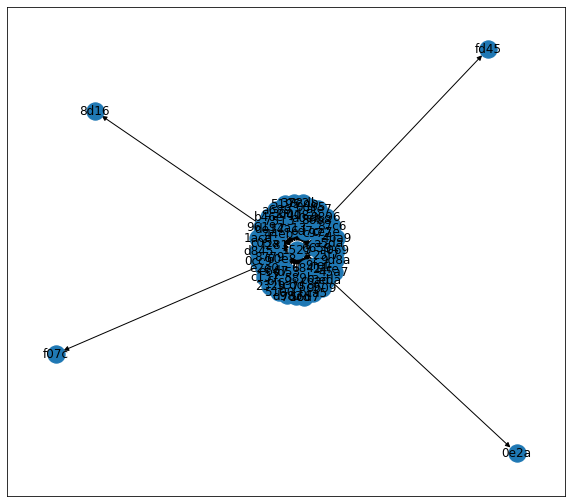

In [435]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


graph = nx.from_pandas_edgelist(df, source = 'fromAddress', target = 'toAddress',
    edge_attr = 'ans',create_using = nx.DiGraph())
    
plt.figure(figsize = (10,9))
nx.draw_networkx(graph)


In [436]:
lookup = ["8d16", "fd45", "0e2a", "f07c"]
for l in lookup:
    print(df[ df["toAddress"]==l ])

                  date fromAddress toAddress tokenName     value  usdPrice  \
28 2022-11-09 20:16:47        1523      8d16  USD Coin  150000.0  1.000717   
31 2022-11-09 19:03:59        1523      8d16  USD Coin   10000.0  1.000111   

              ans  
28  150107.565217  
31   10001.111942  
                  date fromAddress toAddress   tokenName          value  \
77 2022-11-04 03:27:35        1523      fd45  Tether USD  337274.160360   
78 2022-11-04 03:24:59        1523      fd45    USD Coin  100036.264829   
87 2022-11-01 00:25:35        1523      fd45    USD Coin      10.000000   

    usdPrice            ans  
77  0.999984  337268.788127  
78  1.000134  100049.659599  
87  1.000057      10.000574  
                  date fromAddress toAddress tokenName         value  \
14 2022-11-15 13:05:23        1523      0e2a  USD Coin  61921.564376   

    usdPrice           ans  
14  1.000257  61937.496148  
                  date fromAddress toAddress tokenName     value  usdPrice  \
32 

In [ ]:
https://towardsdatascience.com/social-network-analysis-from-theory-to-applications-with-python-d12e9a34c2c7
https://networkx.org/documentation/stable/reference/generated/networkx.convert_matrix.from_pandas_edgelist.html
https://tuangauss.github.io/projects/networkx_basemap/networkx_basemap.html
https://www.datacamp.com/tutorial/social-network-analysis-python

https://towardsdatascience.com/social-network-analysis-from-theory-to-applications-with-python-d12e9a34c2c7

docs: https://api.etherscan.io/apis

https://github.com/yu-to-chen/data-science/blob/master/data8/functions/Functions_and_Tables.ipynb

COVID-19 Regression https://colab.research.google.com/drive/18hEFk3VzaQoVvTgv3PDj-iBdw3Di2RTU?usp=sharing

Linear Regression Demo: https://colab.research.google.com/drive/18hEFk3VzaQoVvTgv3PDj-iBdw3Di2RTU?usp=sharing


https://etherscan.io/address/0x5425a0f2633b60b9f2400d82ed6596b5a4b41523
https://ethplorer.io/address/0x5425a0f2633b60b9f2400d82ed6596b5a4b41523#: 可以看的到出入金

https://colab.research.google.com/drive/1hsyt88CdxknHPzVq6bbuq-_2X_CBf554#scrollTo=w4eOXIwSXBTP


In [307]:
for index, row in df.iterrows():
    print(row)

date                                          2022-12-07 10:04:59
txHash          0x670de6525a2225c68e39e233b65da05c4c1b173ebf76...
txNoteUser                                                    NaN
fromAddress            0x5425a0f2633b60b9f2400d82ed6596b5a4b41523
fromTagsUser                                                  NaN
fromNoteUser                                                  NaN
fromTags                                                      NaN
toAddress              0xda25c599c03ae85ae3bc574e20671b2fd8a1f431
toTagsUser                                                    NaN
toNoteUser                                                    NaN
toTags                                                        NaN
tokenName                                              Tether USD
tokenAddress           0xdac17f958d2ee523a2206206994597c13d831ec7
tokenSymbol                                                  USDT
value                                                59142,812936
usdPrice  

In [321]:
df_stablecoins = df[ df["fromTags"]=="Stablecoins" ][["date", "fromAddress", "toAddress", "tokenName", "value", "usdPrice"]]
df_stablecoins


,date,fromAddress,toAddress,tokenName,value,usdPrice
11,2022-11-24 15:50:59,0xdac17f958d2ee523a2206206994597c13d831ec7,0x5425a0f2633b60b9f2400d82ed6596b5a4b41523,$ USTBonus.com,7000,NaN
18,2022-11-11 12:16:35,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0x5425a0f2633b60b9f2400d82ed6596b5a4b41523,$ USDCGift.com,7000,NaN
50,2022-11-07 11:59:47,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0x5425a0f2633b60b9f2400d82ed6596b5a4b41523,$ USDCBonus.com,7000,NaN
